In this notebook we will answer quetion 1 from the Kaggle Speed Dating Experiment which informs how we partition the dataset (by gender).

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

os.chdir('/Users/wynnephilpott/Documents/missing pauldron/Data Science/datasets')
df = pd.read_csv('speed.csv', encoding = "ISO-8859-1")

Daters were asked to allocate 100 points to what attributes they value in a potential partner. The attributes are attraction, sincerity, intelligence, fun, amition, shared interests. Lets create a dataframe w/ these fields and explore. Keep 'iid' for analysis and 'gender' b/c we will stratify by it.

In [2]:
df = df[['iid','gender','attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']]

In [3]:
#drop missing rows
df.dropna(axis=0,inplace=True)

In [4]:
#group by iid to deduplicate

dfg = df.groupby('iid').mean()

print(df.shape)
print(dfg.shape)

(8257, 8)
(541, 7)


In [5]:
#generate a list of how daters allocate points on average
l = []
for field in dfg.drop('gender',axis=1):
    l.append(dfg[field].mean())
l = [round(n, 2) for n in l]

In [6]:
#generate a dataframe using above list
avg_allocation = pd.DataFrame(l,dfg.drop('gender',axis=1).columns)
avg_allocation.columns = ['Average']
avg_allocation

,Average
attr1_1,22.52
sinc1_1,17.31
intel1_1,20.17
fun1_1,17.46
amb1_1,10.81
shar1_1,11.83


In [7]:
summary = dfg.drop(['gender'],axis=1).describe()
st = summary.transpose()
st

,count,mean,std,min,25%,50%,75%,max
attr1_1,541.0,22.515527,12.727252,0.0,15.00,20.0,25.0,100.0
sinc1_1,541.0,17.312699,7.210096,0.0,15.00,18.0,20.0,60.0
intel1_1,541.0,20.171423,6.871165,0.0,17.31,20.0,23.0,50.0
fun1_1,541.0,17.460425,6.193168,0.0,15.00,18.0,20.0,50.0
amb1_1,541.0,10.807967,6.234773,0.0,5.00,10.0,15.0,53.0
shar1_1,541.0,11.832126,6.474104,0.0,8.33,11.0,16.0,30.0


In [8]:
st['mean'].sort_values(ascending = False)

attr1_1     22.515527
intel1_1    20.171423
fun1_1      17.460425
sinc1_1     17.312699
shar1_1     11.832126
amb1_1      10.807967
Name: mean, dtype: float64

For males and females we have attraction followed by intelligence.

**Females**

In [14]:
female = dfg[dfg['gender']==0]

In [15]:
summary = female.drop(['gender'],axis=1).describe()
st = summary.transpose()
st

,count,mean,std,min,25%,50%,75%,max
attr1_1,268.0,17.938358,9.856742,0.0,12.180,15.09,20.00,90.0
sinc1_1,268.0,18.252910,6.972549,0.0,15.000,20.00,20.00,60.0
intel1_1,268.0,20.937313,6.800901,2.0,17.965,20.00,25.00,50.0
fun1_1,268.0,17.326343,5.630626,0.0,15.000,18.00,20.00,40.0
amb1_1,268.0,12.828993,5.468618,0.0,10.000,15.00,16.67,30.0
shar1_1,268.0,12.697836,5.912185,0.0,10.000,13.21,16.00,30.0


In [16]:
attributes_female = st['mean'].sort_values(ascending = False)
attributes_female

intel1_1    20.937313
sinc1_1     18.252910
attr1_1     17.938358
fun1_1      17.326343
amb1_1      12.828993
shar1_1     12.697836
Name: mean, dtype: float64

The least desirable attribute females percieve is shared interests.

**Males**

In [18]:
male = dfg[dfg['gender']==1]

In [20]:
summary = male.drop(['gender'],axis=1).describe()
st = summary.transpose()

attributes_male = st['mean'].sort_values(ascending = False)
attributes_male

attr1_1     27.008864
intel1_1    19.419560
fun1_1      17.592051
sinc1_1     16.389707
shar1_1     10.982271
amb1_1       8.823956
Name: mean, dtype: float64

In [7]:
#least desired attribute is ambition

Do men and woman fill out responses differently? Lets use PCA to scale 6 dimensions down to 2 and color-compare genders.

In [21]:
#PCA

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dfg)

scale = scaler.transform(dfg)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scale)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
x_pca = pca.transform(scale)

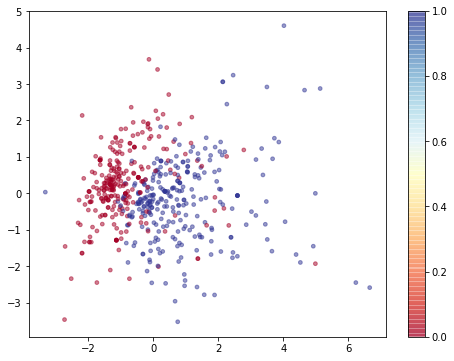

In [24]:
plt.figure(figsize=(8,6)) 
plt.scatter(x_pca[:,0],x_pca[:,1],s=14,c=dfg['gender'],cmap='RdYlBu',alpha=.5)
plt.colorbar()

Perhaps it would be wise to split up male and female in our model.